<a href="https://colab.research.google.com/github/Betancur1991/Sales-Predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [65]:
filename = '/content/drive/MyDrive/Codificación de Dojo/Proyecto1/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


1) ¿Cuántas filas y columnas?

In [66]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [67]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [68]:
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [69]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 0, 'Productos')

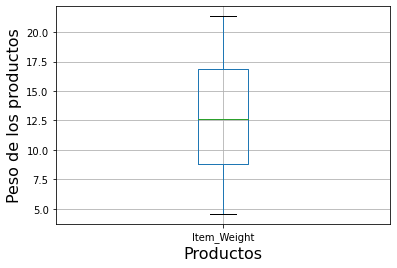

In [71]:
boxplot = df.boxplot(column=['Item_Weight'])
plt.ylabel('Peso de los productos',fontsize = 16)
plt.xlabel('Productos', fontsize = 16)

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [72]:
x=df['Item_Identifier'].value_counts()
x


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Como no tengo el dato de los pesos faltantes y el rango en el que estos se mueven no es muy amplio decidi poner el valor que le sigue al campo vacío.

In [73]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [74]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [75]:
df['Outlet_Size']=df.loc[ : ,'Outlet_Size'].fillna(method='ffill')

In [76]:
df['Outlet_Size'].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

Como es difícil evidenciar una tendencia clara, llenar igualmente con el valor siguiente al campo vacio

In [77]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [78]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Item_Weight')

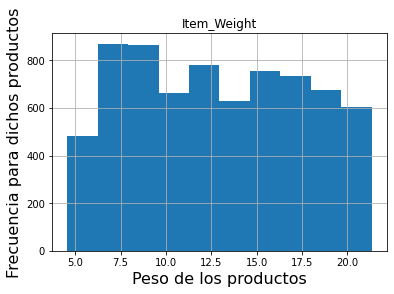

In [79]:
df['Item_Weight'].hist()
plt.ylabel('Frecuencia para dichos productos',fontsize = 16)
plt.xlabel('Peso de los productos', fontsize = 16)
plt.title('Item_Weight')

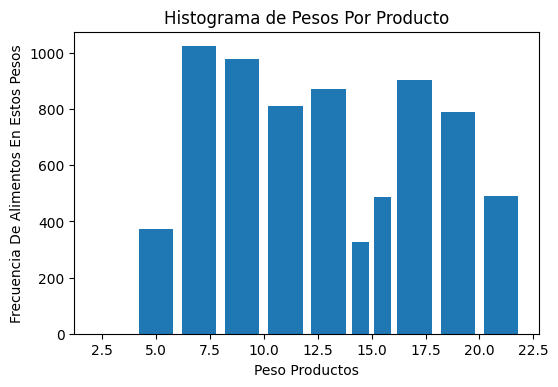

In [80]:
num_bins=[2,4,6,8,10,12,14,15,16,18,20,22]
fig1=plt.figure(dpi=100)
ax1=fig1.add_subplot(1,1,1)
ax1.hist(df['Item_Weight'],num_bins,density=False,rwidth=0.8)
ax1.set_xlabel('Peso Productos')
ax1.set_ylabel('Frecuencia De Alimentos En Estos Pesos')
ax1.set_title('Histograma de Pesos Por Producto')
plt.show()

In [81]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [82]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


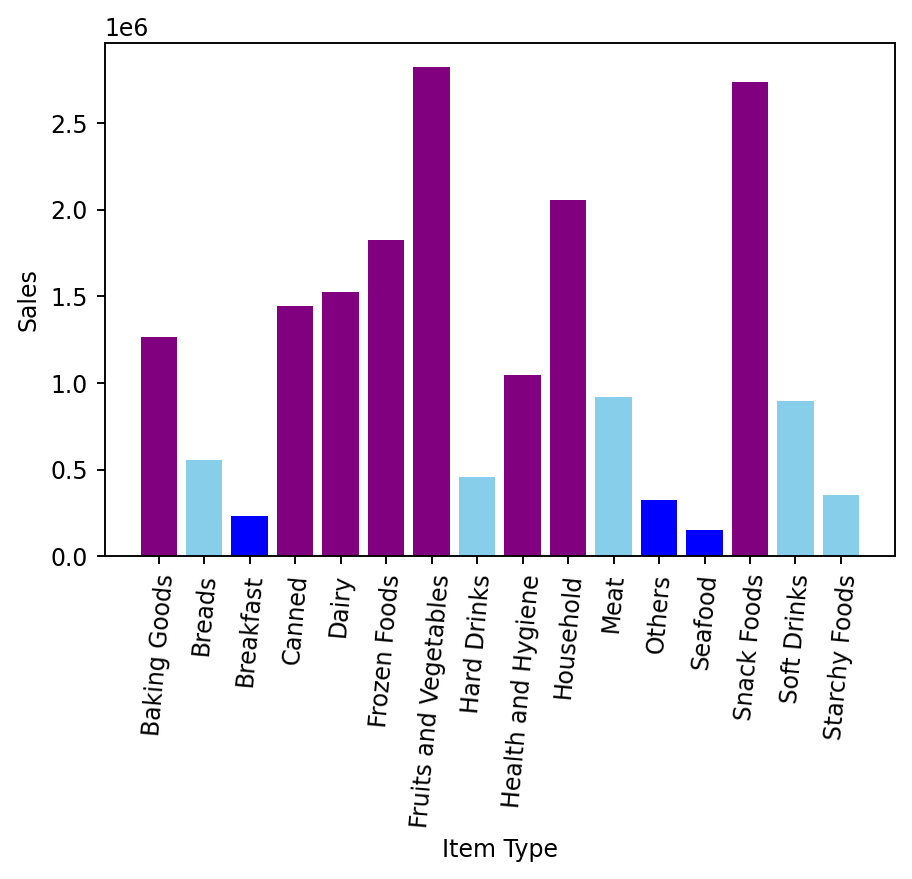

In [83]:
different_categores = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()  
fig1 = plt.figure(dpi=170)
ax1 = fig1.add_subplot(1,1,1)
bars = ax1.bar(list(different_categores.index),different_categores, align='center', linewidth=0, color='skyblue')
plt.xlabel("Item Type")
plt.xticks(rotation = 85)
plt.ylabel("Sales")

for x in bars:
    bar_1 = bars[10].get_height()
    bar_2 = bars[15].get_height()
    if x.get_height() > bar_1:
        x.set_color('purple')
    elif x.get_height() < bar_2:
        x.set_color("blue")

#ax2 = fig1.add_subplot(1,2,2)
#bars = ax2.bar(list(different_categores.index),different_categores, align='center', linewidth=0, color='orange')
#plt.xlabel("Item Type")
#plt.xticks(rotation = 85)
#plt.ylabel("Sales")


In [84]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


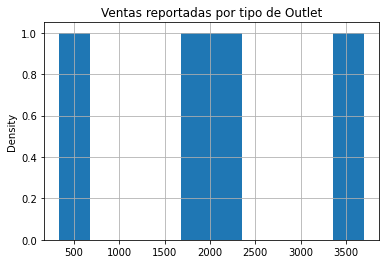

In [85]:
df.groupby("Outlet_Type").Item_Outlet_Sales.mean().hist()
plt.title('Ventas reportadas por tipo de Outlet')
plt.ylabel('Density')
plt.show()

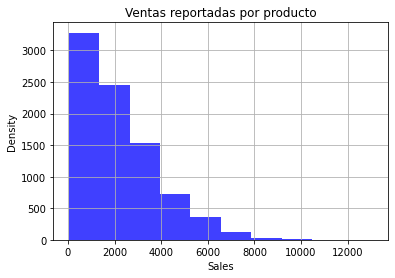

In [86]:
plt.hist(df.Item_Outlet_Sales,10, facecolor='b',alpha=0.75)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Ventas reportadas por producto')

plt.grid(True)
plt.show()

In [87]:
h=df.groupby("Outlet_Type").Item_Outlet_Sales.mean()
h

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

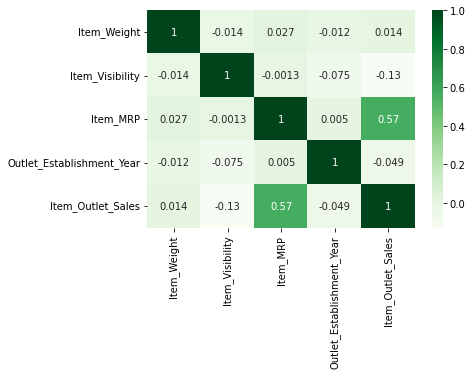

In [88]:
filter_map=df.loc[: ,['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
corr = filter_map.corr()
df_corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.xticks(rotation=90)

In [89]:
df.shape

(8523, 12)

In [90]:
np.random.seed(0)
for i in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=True)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )

[12  5  0  3 11  3  7  9  3  5  2  4  7  6  8] ,Num Samples: 15,numberUnique: 11
[ 8 12 10  1  6  7  7 14  8  1  5  9 13  8  9] ,Num Samples: 15,numberUnique: 10
[ 4  3  0  3  5 14  0  2  3  8  1  3 13  3  3] ,Num Samples: 15,numberUnique: 9
[14  7  0  1  9  9  0 10  4  7  3 14 11  2  7] ,Num Samples: 15,numberUnique: 10
[12  2  0  0  4  5  5  6  8  4  1  4  9 10 10] ,Num Samples: 15,numberUnique: 10
[ 8  1  1  7  9  9  3  6  7 11 14  2 11  0 14] ,Num Samples: 15,numberUnique: 10
[ 3  5 12  9 10  4 11  4  6  4  4  3 12  4  4] ,Num Samples: 15,numberUnique: 8
[ 8 14  4  3 10  7 13  5  5  0  1  5  9  3  0] ,Num Samples: 15,numberUnique: 11
[ 5 14  0  1  2  4  2  0 13  3  2 10 13  0  7] ,Num Samples: 15,numberUnique: 10
[ 5  9  0 10  2 11 10  7 11  2  9  2 14  3 14] ,Num Samples: 15,numberUnique: 9
[11  3  2 14  3  4  1  2 11 14  9 10  1  4 10] ,Num Samples: 15,numberUnique: 8
[ 6 11  8 11  2  3  0  0  6  0  6  3 14 10  3] ,Num Samples: 15,numberUnique: 8
[ 8 12  8 13 14  8 13  2  3 14  2

In [91]:
samples

array([ 8,  3,  8, 10,  2,  8,  4,  3, 12, 13, 14,  0,  4,  3, 13])

In [92]:

filtrol=df.loc[samples, :]
filtrol


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
10,FDY07,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
12,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
13,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076


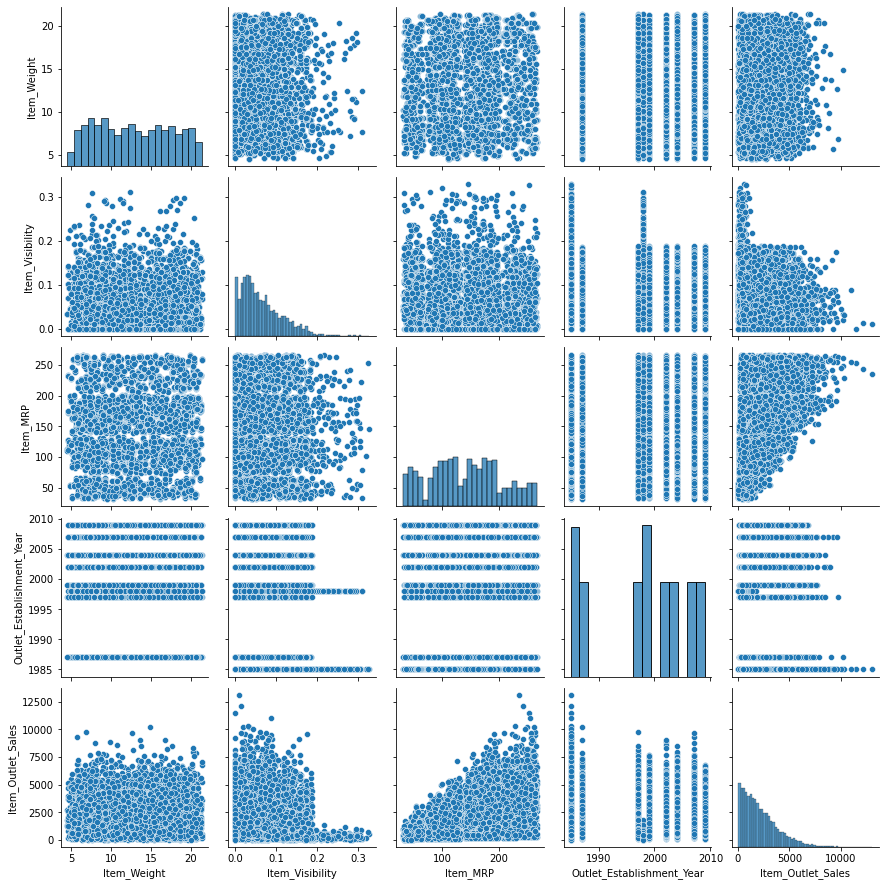

In [93]:
sns.pairplot(df)


In [99]:
filename = '/content/drive/MyDrive/Codificación de Dojo/Proyecto1/sales_predictions.csv'
df = pd.read_csv(filename)

In [100]:
pd.options.display.max_columns = None
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [101]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [102]:
replacement_dictionary = {'Medium':1, 'Small':0, 'High':2}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [103]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [104]:
replacement_dictionary = {'reg':1, 'Low Fat':0, 'LF':0, 'low fat':0,'Regular':1}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [105]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 799.2+ KB


In [107]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [108]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [110]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [111]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [112]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [113]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f976fa0f410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f976fa0f910>)])

In [114]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f976fa0f410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f976fa0f910>)])

In [115]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [116]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1589)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])